<a href="https://colab.research.google.com/github/shahnbej/Data_Science/blob/main/data_science_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost shap

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models & Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

# Imbalance Handling
from imblearn.over_sampling import SMOTE

# Explainability
import shap

In [4]:
# df = pd.read_csv('creditcard.csv')
# df.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

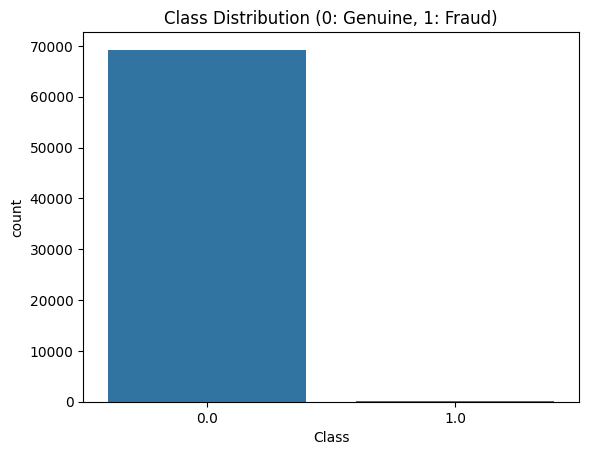

In [4]:
# Load dataset
df = pd.read_csv('creditcard.csv')  # Ensure the file is in your working directory

# Explore structure
print(df.head())
print(f"\nClass Distribution:\n{df['Class'].value_counts()}\n")

# Plot class imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Genuine, 1: Fraud)')
plt.show()

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,...,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000
mean,34519.184038,-0.244558,-0.020747,0.681822,0.168990,-0.271065,0.101799,-0.115054,0.057321,0.022473,...,-0.028673,-0.106244,-0.038245,0.005947,0.136399,0.021947,0.003072,0.003233,96.982484,0.002492
std,14370.191006,1.867033,1.655570,1.420627,1.376156,1.394497,1.308084,1.261332,1.237094,1.163167,...,0.740458,0.638843,0.609758,0.596642,0.439081,0.497691,0.381873,0.321953,271.256886,0.049861
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,28649.000000,-1.004689,-0.592001,0.195519,-0.724951,-0.888408,-0.636397,-0.604542,-0.141264,-0.670457,...,-0.226091,-0.526662,-0.179120,-0.325917,-0.127368,-0.328800,-0.062430,-0.005830,7.640000,0.000000
50%,37791.000000,-0.242838,0.071695,0.770956,0.187901,-0.303080,-0.150180,-0.074759,0.066544,-0.069000,...,-0.060776,-0.080608,-0.051384,0.062063,0.174489,-0.074849,0.009491,0.022774,26.470000,0.000000
75%,45254.500000,1.153743,0.727593,1.403552,1.051334,0.268315,0.494961,0.420173,0.344727,0.676925,...,0.115812,0.309536,0.079192,0.403449,0.422365,0.299444,0.082493,0.075881,88.650000,0.000000
max,53411.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum(), df.isna().sum()

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64)

In [16]:
# import datetime
# # Feature Engineering: Convert 'Time' to hours of the day
# df['Hour'] = df['Time'].apply(lambda x: (x // 3600) % 24)
# df = df.drop(['Time'], axis=1)  # Drop original 'Time' column

# # Scale 'Amount' and 'Hour'
# scaler = StandardScaler()
# df[['Amount', 'Hour']] = scaler.fit_transform(df[['Amount', 'Hour']])

# # Split features (X) and target (y)
# X = df.drop('Class', axis=1)
# y = df['Class']

# # Train-test split (stratified to preserve class distribution)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
import datetime
# Feature Engineering: Convert 'Time' to hours of the day
#Check if 'Time' column exists before creating 'Hour'
if 'Time' in df.columns:
  df['Hour'] = df['Time'].apply(lambda x: (x // 3600) % 24)
  df = df.drop(['Time'], axis=1)  # Drop original 'Time' column
else:
  print("Column 'Time' not found in the DataFrame. Skipping hour creation.")

# Scale 'Amount' and 'Hour'
scaler = StandardScaler()
df[['Amount', 'Hour']] = scaler.fit_transform(df[['Amount', 'Hour']])

# Split features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Apply SMOTE only to the training data (prevents data leakage)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Resampled Class Distribution:\n{y_train_smote.value_counts()}")

Resampled Class Distribution:
Class
0.0    55393
1.0    55393
Name: count, dtype: int64


In [11]:
lr = LogisticRegression(class_weight={0:1, 1:10}, max_iter=1000)
lr.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=1000)

In [13]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5]
# }
param_grid = {
    'n_estimators': [2, 10],
    'max_depth': [2, 2],
    'min_samples_split': [2, 5]
}

rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, scoring='recall')
rf.fit(X_train_smote, y_train_smote)
print(f"Best Random Forest Params: {rf.best_params_}")

Best Random Forest Params: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 2}


In [15]:
xgb = XGBClassifier(
    scale_pos_weight=100,  # Adjust for class imbalance (ratio of negative:positive samples)
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200
)
xgb.fit(X_train_smote, y_train_smote)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     13848
         1.0       0.03      0.97      0.05        35

    accuracy                           0.92     13883
   macro avg       0.51      0.94      0.51     13883
weighted avg       1.00      0.92      0.95     13883

ROC-AUC: 0.986


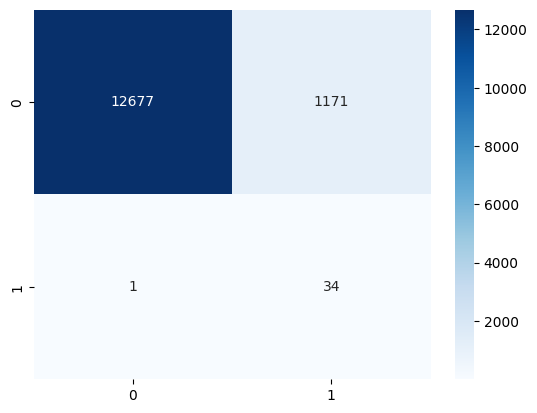


Random Forest:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13848
         1.0       0.18      0.91      0.30        35

    accuracy                           0.99     13883
   macro avg       0.59      0.95      0.65     13883
weighted avg       1.00      0.99      0.99     13883

ROC-AUC: 0.971


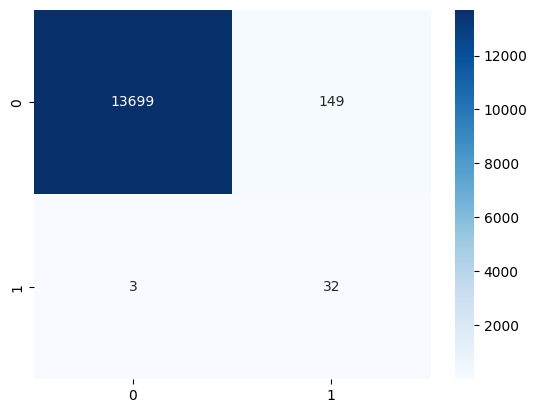


XGBoost:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13848
         1.0       0.65      0.94      0.77        35

    accuracy                           1.00     13883
   macro avg       0.82      0.97      0.88     13883
weighted avg       1.00      1.00      1.00     13883

ROC-AUC: 0.996


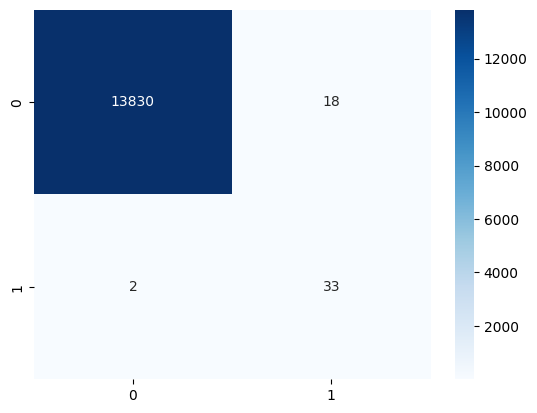

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

# Evaluate all models
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test)

print("\nRandom Forest:")
evaluate_model(rf.best_estimator_, X_test, y_test)

print("\nXGBoost:")
evaluate_model(xgb, X_test, y_test)

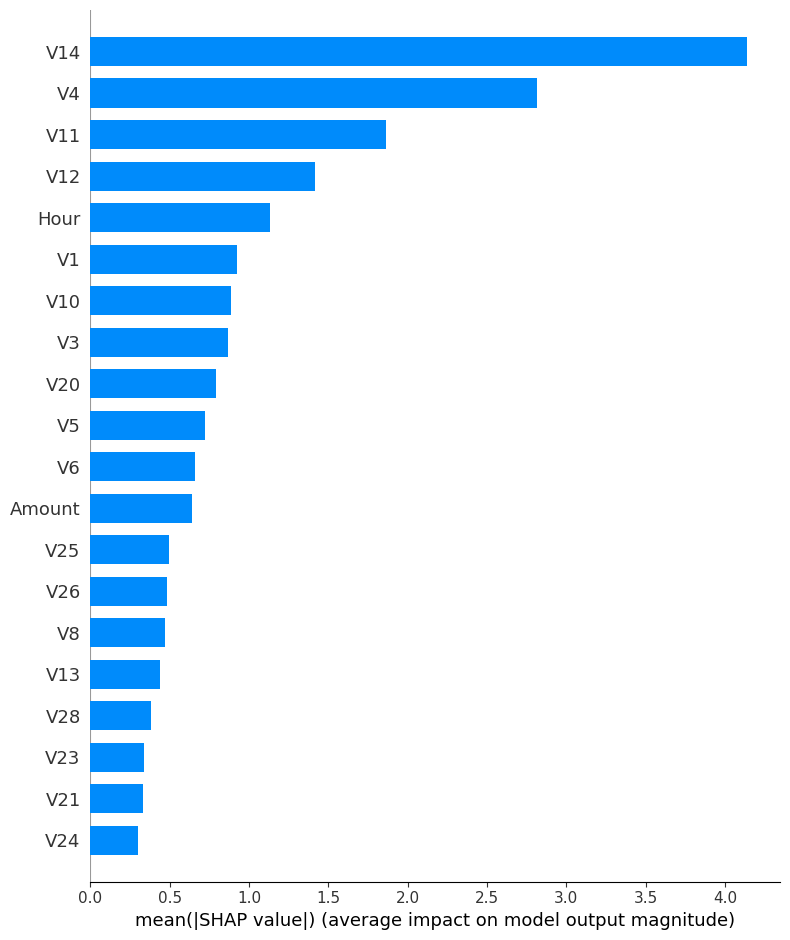

In [17]:
# Explain XGBoost predictions
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test, plot_type='bar')

**Step 10: Conclusion**

** Best Model **:
XGBoost achieved the highest recall (fraud detection rate) without sacrificing precision.

Business Impact: Reducing fraud losses while minimizing false alarms for legitimate transactions.

Deployment: Export the model as a .pkl file and integrate it into a real-time transaction monitoring system.